In [5]:
import os
os.chdir('/home/llu/HardDisk/TCGA_HC_image/results/HCC_clinical')

In [ ]:
# count image shape
import openslide
import pandas as pd
import numpy as np
from openslide.deepzoom import DeepZoomGenerator

svspath = '/home/llu/HardDisk/TCGA_HC_image/' + 'SVS_Data/'
allfiles = os.listdir(svspath)
df = pd.DataFrame(index = range(len(allfiles)), columns = ['TCGA number', 'SVS code', 'Level', 'Level dim', 'Downsample dim', 'Tiles', 'Tile dim'])
for i in range(len(allfiles)):
    code = allfiles[i]
    #code = 'fa5919e4-2398-483a-ae51-f667646e1e3c'
    #print(os.listdir('SVS_Data/fa5919e4-2398-483a-ae51-f667646e1e3c'))
    one = os.listdir(svspath + code)
    one = [ n for n in one if 'svs' in n]     
    filename = svspath + code + '/' + one[0]
    test = openslide.open_slide(filename)
    
    downsamples=test.level_downsamples
    [w,h]=test.level_dimensions[0]

    print(downsamples)
    print(test.level_dimensions)
    size1=int(w*(downsamples[0]/downsamples[2]))
    size2=int(h*(downsamples[0]/downsamples[2]))
    region=np.array(test.read_region((0,0), 2, (size1,size2)))
    img = region
    print(size1, size2, img.shape)
    
    tiles = DeepZoomGenerator(test)
    #print(tiles.level_count, tiles.level_tiles, tiles.level_dimensions)
    dim = tiles.level_dimensions[-1]
    level = tiles.level_count
    tile = tiles.level_tiles[-1]
    tile_count = tiles.tile_count
    test.close()
    
    #print(str(dim), str((size1,size2)))
    df.iloc[i, :] = [one, code, level, str(dim), str((size1,size2)), tile_count, tile]

print(df.shape)


(1.0, 4.000132222662964, 16.004740241666905)
((61752, 30254), (15438, 7563), (3859, 1890))
3858 1890 (1890, 3858, 4)
(1.0, 4.0, 16.000949667616332, 32.001899335232665)
((95616, 33700), (23904, 8425), (5976, 2106), (2988, 1053))
5975 2106 (2106, 5975, 4)
(1.0, 4.0000894591660625, 16.000711705444374, 32.00142341088875)
((90439, 86529), (22609, 21632), (5652, 5408), (2826, 2704))
5652 5407 (5407, 5652, 4)
(1.0, 4.000418868493566, 16.005919472805978)
((31871, 26023), (7967, 6505), (1991, 1626))
1991 1625 (1625, 1991, 4)
(1.0, 4.000017851404905, 16.00156745036736, 32.00636379920507)
((112037, 79324), (28009, 19831), (7002, 4957), (3501, 2478))
7001 4957 (4957, 7001, 4)
(1.0, 4.0001290901882705, 16.001758945772487, 32.00351789154497)
((115535, 77767), (28883, 19441), (7220, 4860), (3610, 2430))


In [8]:
df.head()

TCGA number  \
0  [TCGA-DD-AAEI-01Z-00-DX1.9EAE527E-FF17-447F-8D...   
1  [TCGA-LG-A9QC-01A-01-TSA.3058CB8A-1B9D-4B6B-B9...   
2  [TCGA-DD-AAVQ-01Z-00-DX1.B8AF8561-01CD-48DD-89...   
3  [TCGA-DD-AADB-01A-01-TS1.B4FC4487-6BED-489C-9B...   
4  [TCGA-BW-A5NQ-01Z-00-DX1.F5543010-CBEB-4BA3-84...   

                               SVS code Level        Level dim Downsample dim  \
0  fa5919e4-2398-483a-ae51-f667646e1e3c    17   (61752, 30254)   (3858, 1890)   
1  3d620649-17f4-407e-83ce-c93c6115e030    18   (95616, 33700)   (2987, 1053)   
2  047c7038-a57b-4017-8daa-ab2589dac4c1    18   (90439, 86529)   (2826, 2703)   
3  0cc9d724-1d4a-4488-a8f2-d31cf62288ed    16   (31871, 26023)   (1991, 1625)   
4  4e69c3be-e35d-421f-a016-dc3bd1856bbe    18  (112037, 79324)   (3500, 2478)   

    Tiles    Tile dim  
0   39074  (244, 120)  
1   67161  (377, 133)  
2  162717  (357, 341)  
3   17379  (126, 103)  
4  184812  (442, 313)

In [ ]:
# plot dimentions

In [4]:
import py_wsi
import py_wsi.imagepy_toolkit as tk

turtle = py_wsi.Turtle(svspath + allfiles[0] + "/", db_location = svspath, db_name = "patch_db")

print("Total WSI images:    " + str(turtle.num_files))
print("LMDB name:           " + str(turtle.db_name))
print("File names:          " + str(turtle.files))

#Retrieving tile dimensions and levels

level_count, level_tiles, level_dims = turtle.retrieve_tile_dimensions(turtle.files[0], patch_size=128)
print("Level count:         " + str(level_count))
print("Level tiles:         " + str(level_tiles))
print("Level dimensions:    " + str(level_dims))

1 WSI found in directory.
Total WSI images:    1
LMDB name:           patch_db
File names:          ['TCGA-DD-AAEI-01Z-00-DX1.9EAE527E-FF17-447F-8D7B-6D69A4947029.svs']
Setting patch size 128 and tile size 128
Level count:         17
Level tiles:         ((1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (2, 1), (4, 2), (8, 4), (16, 8), (31, 15), (61, 30), (121, 60), (242, 119), (483, 237))
Level dimensions:    ((1, 1), (2, 1), (4, 2), (8, 4), (16, 8), (31, 15), (61, 30), (121, 60), (242, 119), (483, 237), (965, 473), (1930, 946), (3860, 1891), (7719, 3782), (15438, 7564), (30876, 15127), (61752, 30254))


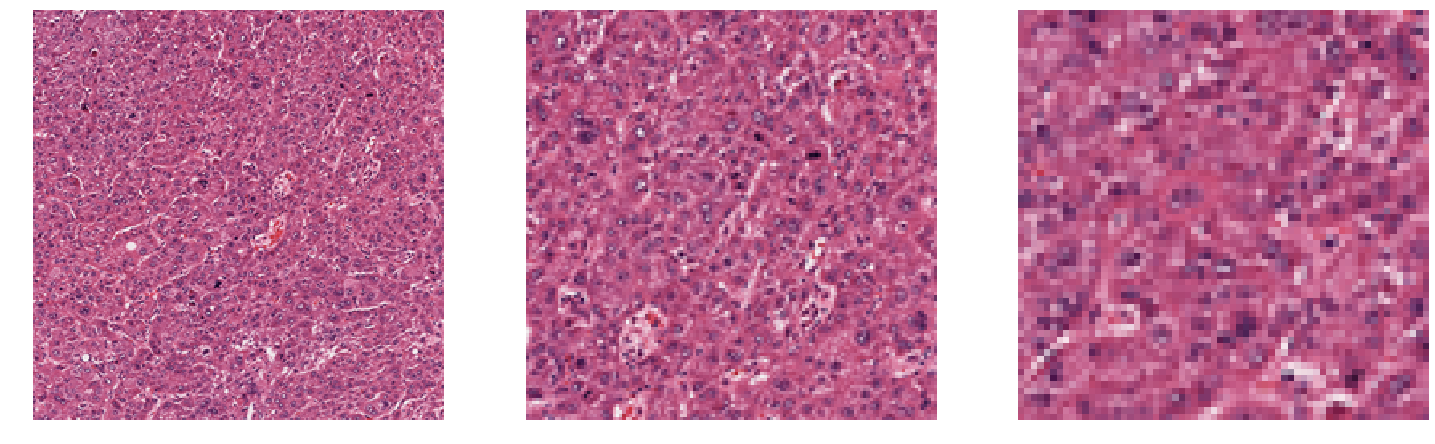

In [5]:
patch_1 = turtle.retrieve_sample_patch(turtle.files[0], 256, 12, overlap=12)
patch_2 = turtle.retrieve_sample_patch(turtle.files[0], 128, 12, overlap=12)
patch_3 = turtle.retrieve_sample_patch(turtle.files[0], 64, 12, overlap=12)

tk.show_images([patch_1, patch_2, patch_3], 3, 1)


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from openslide.deepzoom import DeepZoomGenerator

i = 1
code = allfiles[i]
#code = 'fa5919e4-2398-483a-ae51-f667646e1e3c'
#print(os.listdir('SVS_Data/fa5919e4-2398-483a-ae51-f667646e1e3c'))
one = os.listdir(svspath + code)
one = [ n for n in one if 'svs' in n]     
filename = svspath + code + '/' + one[0]
test = openslide.open_slide(filename)
  
highth = 2000
data_gen = DeepZoomGenerator(test, tile_size=highth, overlap=0, limit_bounds=False)
#print(data_gen.tile_size)
print(tiles.level_count, data_gen.tile_count, tiles.level_tiles, tiles.level_dimensions)

plt.imshow(data_gen.get_tile(16))

'''
#data_gen.get_tile_coordinates(level, (10, 10))
#i = j = 100
i = 100
j = 100
img = np.array(data_gen.get_tile(16, (i, j)))

plt.imshow(img)

'''
# dimentions from df

18 1130 ((1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (2, 1), (3, 1), (5, 2), (9, 3), (17, 5), (34, 9), (67, 17), (134, 34), (268, 67)) ((1, 1), (2, 1), (3, 1), (5, 2), (9, 3), (17, 5), (34, 9), (67, 17), (133, 34), (266, 67), (532, 133), (1064, 266), (2127, 532), (4253, 1064), (8505, 2127), (17009, 4254), (34018, 8508), (68036, 17015))


TypeError: get_tile() missing 1 required positional argument: 'address'

(1.0, 4.000126502035542, 16.00219028622889, 32.00705926520305)
((95615, 94123), (23903, 23530), (5975, 5882), (2987, 2941))
5975 5881
(5881, 5975, 4)


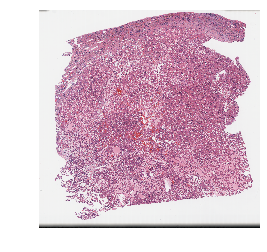

In [6]:
import openslide
import pandas as pd
import numpy as np
from openslide.deepzoom import DeepZoomGenerator
import matplotlib.pyplot as plt
%matplotlib inline

filename = "/home/llu/HardDisk/TCGA_HC_image/SVS_Data/aaa8a746-c25c-4775-8724-2b54a261ccfc/TCGA-G3-AAV2-01Z-00-DX1.3ED62AC3-439B-4971-A710-6BEF87BFF173.svs"
test = openslide.open_slide(filename)
source = test

downsamples=source.level_downsamples
[w,h]=source.level_dimensions[0]

size1=int(w*(downsamples[0]/downsamples[2]))
size2=int(h*(downsamples[0]/downsamples[2]))

region=np.array(source.read_region((0,0),2,(size1,size2)))

print(downsamples)
print(source.level_dimensions)
#scipy.misc.imsave("/home/ccf/CCF/Colorecal-cancer_FCN/data/save/2017-01-15-02-55-11_2.tif" ,region)
#end=time.time()
#print(end-start)
print(size1, size2)
print(region.shape)
plt.imshow(region)
plt.axis('off')
plt.savefig("flow_downsample.pdf")

(1.0, 4.000126502035542, 16.00219028622889, 32.00705926520305)
((95615, 94123), (23903, 23530), (5975, 5882), (2987, 2941))
2987 2940


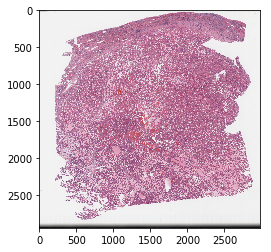

In [7]:
size1=int(w*(downsamples[0]/downsamples[3]))
size2=int(h*(downsamples[0]/downsamples[3]))

region=np.array(source.read_region((0,0),3,(size1,size2)))


print(downsamples)
print(source.level_dimensions)
#scipy.misc.imsave("/home/ccf/CCF/Colorecal-cancer_FCN/data/save/2017-01-15-02-55-11_2.tif" ,region)
#end=time.time()
#print(end-start)
print(size1, size2)
plt.imshow(region)

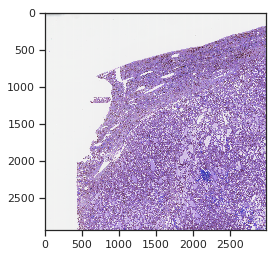

In [18]:
import cv2

img = region
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)


In [52]:
def normalize_staining(img):
    """
    Adopted from "Classification of breast cancer histology images using Convolutional Neural Networks",
    Teresa Araújo , Guilherme Aresta, Eduardo Castro, José Rouco, Paulo Aguiar, Catarina Eloy, António Polónia,
    Aurélio Campilho. https://doi.org/10.1371/journal.pone.0177544
    Performs staining normalization.
    # Arguments
        img: Numpy image array.
    # Returns
        Normalized Numpy image array.
    """
    Io = 240
    beta = 0.15
    alpha = 1
    HERef = np.array([[0.5626, 0.2159],
                      [0.7201, 0.8012],
                      [0.4062, 0.5581]])
    maxCRef = np.array([1.9705, 1.0308])

    h, w, c = img.shape
    img = img.reshape(h * w, c)
    OD = -np.log((img.astype("uint16") + 1) / Io)
    ODhat = OD[(OD >= beta).all(axis=1)]
    W, V = np.linalg.eig(np.cov(ODhat, rowvar=False))

    Vec = -V.T[:2][::-1].T  # desnecessario o sinal negativo
    That = np.dot(ODhat, Vec)
    phi = np.arctan2(That[:, 1], That[:, 0])
    minPhi = np.percentile(phi, alpha)
    maxPhi = np.percentile(phi, 100 - alpha)
    vMin = np.dot(Vec, np.array([np.cos(minPhi), np.sin(minPhi)]))
    vMax = np.dot(Vec, np.array([np.cos(maxPhi), np.sin(maxPhi)]))
    if vMin[0] > vMax[0]:
        HE = np.array([vMin, vMax])
    else:
        HE = np.array([vMax, vMin])

    HE = HE.T
    Y = OD.reshape(h * w, c).T

    C = np.linalg.lstsq(HE, Y)
    maxC = np.percentile(C[0], 99, axis=1)

    C = C[0] / maxC[:, None]
    C = C * maxCRef[:, None]
    Inorm = Io * np.exp(-np.dot(HERef, C))
    Inorm = Inorm.T.reshape(h, w, c).clip(0, 255).astype("uint8")

    return Inorm


img_norm = normalize_staining(img)

plt.imshow(img_norm)

MemoryError: 

In [10]:
import re
import numpy as np
from scipy.stats import iqr
##process x and y pixel

def obtain_pp(column = df['Level dim'].tolist()):

    xy = column
    #print(xy[:5])

    #xy = [i.replace('()', '') for i in xy]
    xy = [re.sub('[(|)]', '', i) for i in xy]
    xx = [ int(i.split(', ')[0]) for i in xy]
    yy = [ int(i.split(', ')[1]) for i in xy]
    #xx = iqr(np.array(xx))
    print([np.max(xx), np.min(xx), np.median(xx)])
    print([np.max(yy), np.min(yy), np.median(yy)])
    
    return(xx, yy)

xx1, yy1 = obtain_pp(column = df['Level dim'].tolist())
xx2, yy2 = obtain_pp(column = df['Downsample dim'].tolist())




[209439, 11952, 89640.0]
[98570, 8772, 35870.0]
[4079, 1057, 2806.5]
[3039, 377, 1235.5]


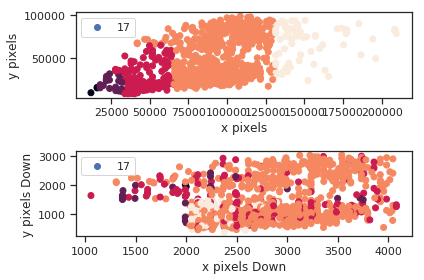

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks")

%matplotlib inline 

ax = plt.subplot(211)

ax.scatter(xx1, yy1, c=df['Level'].tolist())
#ax.legend(df['Level'].tolist())
ax.set_ylabel("y pixels")
ax.set_xlabel("x pixels")

ax = plt.subplot(212)
ax.scatter(xx2, yy2, c=df['Level'].tolist())
#ax.legend(df['Level'].tolist())
ax.set_ylabel("y pixels Down")
ax.set_xlabel("x pixels Down")

plt.tight_layout()
plt.show()
    
plt.savefig("image_downsample.pdf")   # save the figure to file
plt.close()    # close the figure





In [ ]:
sns.pointplot(xx, yy, hue=df['Level'].tolist())

In [ ]:
#openslide
import openslide
import numpy as np
import scipy.misc
from openslide.deepzoom import DeepZoomGenerator
import skimage.io

filename = svspath + 'ac5f8688-cd1d-4bce-84cc-cf95b547bd07/' + 'TCGA-DD-AACD-01Z-00-DX1.1EA42A70-D453-4F92-AD7A-E2462696C985.svs'
slide = openslide.open_slide(filename)

highth = 2000
width = 1000
data_gen = DeepZoomGenerator(slide, tile_size=highth, overlap=0, limit_bounds=False)
print(data_gen.tile_count)
print(data_gen.level_count)


In [ ]:
#img = np.array(test.read_region((0, 0), 0, test.dimensions))
#scipy.misc.imsave('test.tif', img)
from skimage import io
import numpy as np
w = 6175
h = 3025
num_w = int(np.floor(w/width))+1
num_h = int(np.floor(h/highth))+1
print(num_w, num_h)
for i in range(num_w):
    for j in range(num_h):
        img = np.array(data_gen.get_tile(16, (i, j))) #切图
        io.imsave("02"+str(i)+'_'+str(j)+".png", img) #保存图像
        #print(join(result_path, "02"+str(i)+'_'+str(j)+".png"))
        print(img.shape)

In [ ]:
tile = np.array(slide.read_region((0,0),6, (10,10)))

In [ ]:
from IPython.display import Image
Image(filename='024_1.png')

In [ ]:
##use HistomicsTK
import skimage
import matplotlib.pyplot as plt

input_image_file = '024_1.png'  # Easy1.png

im_input = skimage.io.imread(input_image_file)[:, :, :3]

plt.imshow(im_input)
_ = plt.title('Input Image', fontsize=16)

In [ ]:
titlesize = 20
plt.imshow( im_input )
plt.xlim([0, im_input.shape[1]])
plt.ylim([0, im_input.shape[0]])
plt.title('Nuclei bounding boxes', fontsize=titlesize)


In [ ]:
def threaded_generator(generator, num_cached=50):
    """Implements threaded generator to produce batches in background thread.
    # Arguments
        generator: an object exposing generator interface.
    # Yields
        Objects generated by generator.
    """
    from queue import Queue

    qu = Queue(maxsize=num_cached)
    sentinel = object()  # guaranteed unique reference

    # define producer (putting items into queue)
    def producer():
        for item in generator:
            qu.put(item)
        qu.put(sentinel)

    # start producer (in a background thread)
    import threading
    thread = threading.Thread(target=producer)
    thread.daemon = True
    thread.start()

    # run as consumer (read items from queue, in current thread)
    item = qu.get()
    while item is not sentinel:
        yield item
        qu.task_done()
        item = qu.get()

In [14]:
import argparse
import numpy as np
import cv2
from scipy import ndimage
from os.path import basename, join, exists
from os import makedirs
#from threaded_generator import threaded_generator
from time import time
import sys

np.random.seed(13)

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

PATCH_SIZES = [1024]
#PATCH_SIZES = [512]
#PATCH_SIZES = [256]
#PATCH_SIZES = [224, 650]

SCALES = [0.5]

DEFAULT_INPUT_DIR = "data/train"
DEFAULT_PREPROCESSED_ROOT = "data/preprocessed/train"

PATCHES_PER_IMAGE = 20
AUGMENTATIONS_PER_IMAGE = 50
COLOR_LO = 0.7
COLOR_HI = 1.3
BATCH_SIZE = 16     # decrease if necessary

#NUM_CACHED = 160
NUM_CACHED = 320


def recursive_glob(root_dir, file_template="*.tif"):
    """Traverse directory recursively. Starting with Python version 3.5, the glob module supports the "**" directive"""

    if sys.version_info[0] * 10 + sys.version_info[1] < 35:
        import fnmatch
        import os
        matches = []
        for root, dirnames, filenames in os.walk(root_dir):
            for filename in fnmatch.filter(filenames, file_template):
                matches.append(os.path.join(root, filename))
        return matches
    else:
        import glob
        return glob.glob(root_dir + "/**/" + file_template, recursive=True)


def normalize_staining(img):
    """
    Adopted from "Classification of breast cancer histology images using Convolutional Neural Networks",
    Teresa Araújo , Guilherme Aresta, Eduardo Castro, José Rouco, Paulo Aguiar, Catarina Eloy, António Polónia,
    Aurélio Campilho. https://doi.org/10.1371/journal.pone.0177544
    Performs staining normalization.
    # Arguments
        img: Numpy image array.
    # Returns
        Normalized Numpy image array.
    """
    Io = 240
    beta = 0.15
    alpha = 1
    HERef = np.array([[0.5626, 0.2159],
                      [0.7201, 0.8012],
                      [0.4062, 0.5581]])
    maxCRef = np.array([1.9705, 1.0308])

    h, w, c = img.shape
    img = img.reshape(h * w, c)
    OD = -np.log((img.astype("uint16") + 1) / Io)
    ODhat = OD[(OD >= beta).all(axis=1)]
    W, V = np.linalg.eig(np.cov(ODhat, rowvar=False))

    Vec = -V.T[:2][::-1].T  # desnecessario o sinal negativo
    That = np.dot(ODhat, Vec)
    phi = np.arctan2(That[:, 1], That[:, 0])
    minPhi = np.percentile(phi, alpha)
    maxPhi = np.percentile(phi, 100 - alpha)
    vMin = np.dot(Vec, np.array([np.cos(minPhi), np.sin(minPhi)]))
    vMax = np.dot(Vec, np.array([np.cos(maxPhi), np.sin(maxPhi)]))
    if vMin[0] > vMax[0]:
        HE = np.array([vMin, vMax])
    else:
        HE = np.array([vMax, vMin])

    HE = HE.T
    Y = OD.reshape(h * w, c).T

    C = np.linalg.lstsq(HE, Y)
    maxC = np.percentile(C[0], 99, axis=1)

    C = C[0] / maxC[:, None]
    C = C * maxCRef[:, None]
    Inorm = Io * np.exp(-np.dot(HERef, C))
    Inorm = Inorm.T.reshape(h, w, c).clip(0, 255).astype("uint8")

    return Inorm


def hematoxylin_eosin_aug(img, low=0.7, high=1.3, seed=None):
    """
    "Quantification of histochemical staining by color deconvolution"
    Arnout C. Ruifrok, Ph.D. and Dennis A. Johnston, Ph.D.
    http://www.math-info.univ-paris5.fr/~lomn/Data/2017/Color/Quantification_of_histochemical_staining.pdf
    Performs random hematoxylin-eosin augmentation
    # Arguments
        img: Numpy image array.
        low: Low boundary for augmentation multiplier
        high: High boundary for augmentation multiplier
    # Returns
        Augmented Numpy image array.
    """
    D = np.array([[1.88, -0.07, -0.60],
                  [-1.02, 1.13, -0.48],
                  [-0.55, -0.13, 1.57]])
    M = np.array([[0.65, 0.70, 0.29],
                  [0.07, 0.99, 0.11],
                  [0.27, 0.57, 0.78]])
    Io = 240

    h, w, c = img.shape
    OD = -np.log10((img.astype("uint16") + 1) / Io)
    C = np.dot(D, OD.reshape(h * w, c).T).T
    r = np.ones(3)
    r[:2] = np.random.RandomState(seed).uniform(low=low, high=high, size=2)
    img_aug = np.dot(C, M) * r

    img_aug = Io * np.exp(-img_aug * np.log(10)) - 1
    img_aug = img_aug.reshape(h, w, c).clip(0, 255).astype("uint8")
    return img_aug


def zoom_aug(img, zoom_var, seed=None):
    """Performs a random spatial zoom of a Numpy image array.
    # Arguments
        img: Numpy image array.
        zoom_var: zoom range multiplier for width and height.
        seed: Random seed.
    # Returns
        Zoomed Numpy image array.
    """
    scale = np.random.RandomState(seed).uniform(low=1 / zoom_var, high=zoom_var)
    resized_img = cv2.resize(img, None, fx=scale, fy=scale, interpolation=cv2.INTER_CUBIC)
    return resized_img


def get_crops(img, size, n, seed=None):
    """Creates random square crops of given size from a Numpy image array. No rotation added
    # Arguments
        img: Numpy image array.
        size: size of crops.
        n: number of crops
        seed: Random seed.
    # Returns
        Numpy array of crops, shape (n, size, size, c).
    """
    h, w, c = img.shape
    assert all([size < h, size < w])
    crops = []
    for _ in range(n):
        top = np.random.randint(low=0, high=h - size + 1)
        left = np.random.randint(low=0, high=w - size + 1)
        crop = img[top: top + size, left: left + size].copy()
        crop = np.rot90(crop, np.random.randint(low=0, high=4))
        if np.random.random() > 0.5:
            crop = np.flipud(crop)
        if np.random.random() > 0.5:
            crop = np.fliplr(crop)
        crops.append(crop)

    crops = np.stack(crops)
    assert crops.shape == (n, size, size, c)
    return crops


def get_crops_free(img, size, n, seed=None):
    """Creates random square crops of given size from a Numpy image array. With rotation
    # Arguments
        img: Numpy image array.
        size: size of crops.
        n: number of crops
        seed: Random seed.
    # Returns
        Numpy array of crops, shape (n, size, size, c).
    """
    h, w, c = img.shape
    assert all([size < h, size < w])
    d = int(np.ceil(size / np.sqrt(2)))
    crops = []
    for _ in range(n):
        center_y = np.random.randint(low=0, high=h - size + 1) + size // 2
        center_x = np.random.randint(low=0, high=w - size + 1) + size // 2
        m = min(center_y, center_x, h - center_y, w - center_x)
        if m < d:
            max_angle = np.pi / 4 - np.arccos(m / d)
            top = center_y - m
            left = center_x - m
            precrop = img[top: top + 2 * m, left: left + 2 * m]
        else:
            max_angle = np.pi / 4
            top = center_y - d
            left = center_x - d
            precrop = img[top: top + 2 * d, left: left + 2 * d]

        precrop = np.rot90(precrop, np.random.randint(low=0, high=4))
        angle = np.random.uniform(low=-max_angle, high=max_angle)
        precrop = ndimage.rotate(precrop, angle * 180 / np.pi, reshape=False)

        precrop_h, precrop_w, _ = precrop.shape
        top = (precrop_h - size) // 2
        left = (precrop_w - size) // 2
        crop = precrop[top: top + size, left: left + size]

        if np.random.random() > 0.5:
            crop = np.flipud(crop)
        if np.random.random() > 0.5:
            crop = np.fliplr(crop)
        crops.append(crop)

    crops = np.stack(crops)
    assert crops.shape == (n, size, size, c)
    return crops


def norm_pool(features, p=3):
    """Performs descriptor pooling
    # Arguments
        features: Numpy array of descriptors.
        p: degree of pooling.
    # Returns
        Numpy array of pooled descriptor.
    """
    return np.power(np.power(features, p).mean(axis=0), 1/p)


def encode(crops, model):
    """Encodes crops
    # Arguments
        crops: Numpy array of crops.
        model: Keras encoder.
    # Returns
        Numpy array of pooled descriptor.
    """
    features = model.predict(crops)
    pooled_features = norm_pool(features)
    return pooled_features


def process_image(image_file):
    """Extract multiple crops from a single image
    # Arguments
        image_file: Path to image.
    # Yields
        Numpy array of image crops.
    """
    #filename = "/home/llu1/HardDisk/TCGA_HC_image/SVS_Data/aaa8a746-c25c-4775-8724-2b54a261ccfc/TCGA-G3-AAV2-01Z-00-DX1.3ED62AC3-439B-4971-A710-6BEF87BFF173.svs"
    img = cv2.imread(image_file)
    if SCALE != 1:
        img = cv2.resize(img, None, fx=SCALE, fy=SCALE, interpolation=cv2.INTER_CUBIC)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_norm = normalize_staining(img)

    for _ in range(AUGMENTATIONS_PER_IMAGE):
        img_aug = hematoxylin_eosin_aug(img_norm, low=COLOR_LO, high=COLOR_HI)
        # img_aug = zoom_aug(img_aug, ZOOM_VAR)

        # single_image_crops = get_crops_free(img_aug, PATCH_SZ, PATCHES_PER_IMAGE)
        single_image_crops = get_crops(img_aug, PATCH_SZ, PATCHES_PER_IMAGE)
        yield single_image_crops


def crops_gen(file_list):
    """Generates batches of crops from image list, one augmentation a time
    # Arguments
        file_list: List of image files.
    # Yields
        Tuple of Numpy array of image crops and name of the file.
    """
    for i, (image_file, output_file) in enumerate(file_list):
        print("Crops generator:", i + 1)
        for crops in process_image(image_file):
            yield crops, output_file


def features_gen(crops_and_output_file, model):
    """Processes crop generator, encodes them and dumps pooled descriptors
    # Arguments
        crops_and_output_file: generator of crops and file names.
        model: Keras encoder.
    # Returns: None
    """
    ts = time()
    current_file = None
    pooled_features = []
    i = 0
    for j, (crops, output_file) in enumerate(crops_and_output_file):
        if current_file is None:
            current_file = output_file
        features = encode(crops, model)
        if output_file == current_file:
            pooled_features.append(features)
        else:
            np.save(current_file, np.stack(pooled_features))
            pooled_features = [features]
            current_file = output_file
            average_time = int((time() - ts) / (i + 1))
            print("Feature generator: {}, {} sec/image.".format(i + 1, average_time))
            i += 1
    if len(pooled_features) > 0:
        np.save(current_file, np.stack(pooled_features))




[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9693063941255698446
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 15932759073624090262
physical_device_desc: "device: XLA_CPU device"
]


In [34]:
import openslide
import cv2
import pandas as pd
import numpy as np
from openslide.deepzoom import DeepZoomGenerator
import matplotlib.pyplot as plt
%matplotlib inline


image_file = "/home/llu/HardDisk/TCGA_HC_image/SVS_Data/aaa8a746-c25c-4775-8724-2b54a261ccfc/TCGA-G3-AAV2-01Z-00-DX1.3ED62AC3-439B-4971-A710-6BEF87BFF173.svs"

source = openslide.open_slide(image_file)
downsamples=source.level_downsamples
[w,h]=source.level_dimensions[0]

size1=int(w*(downsamples[0]/downsamples[2]))
size2=int(h*(downsamples[0]/downsamples[2]))
region=np.array(source.read_region((0,0), 2, (size1,size2)))
img = region

print(downsamples, img.shape)

source.close()

'''
img = cv2.imread(image_file)
if SCALE != 1:
    img = cv2.resize(img, None, fx=SCALE, fy=SCALE, interpolation=cv2.INTER_CUBIC)
'''

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_norm = normalize_staining(img)

#for _ in range(AUGMENTATIONS_PER_IMAGE):
    #img_aug = hematoxylin_eosin_aug(img_norm, low=COLOR_LO, high=COLOR_HI)
    # img_aug = zoom_aug(img_aug, ZOOM_VAR)

    # single_image_crops = get_crops_free(img_aug, PATCH_SZ, PATCHES_PER_IMAGE)
    #single_image_crops = get_crops(img_aug, PATCH_SZ, PATCHES_PER_IMAGE)
    #yield single_image_crops
    
    


(1.0, 4.000126502035542, 16.00219028622889, 32.00705926520305) (5881, 5975, 4)


/home/llu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:92: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
/home/llu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:95: RuntimeWarning: invalid value encountered in true_divide


MemoryError: Unable to allocate array with shape (3, 35138975) and data type float64

(256, 256, 3)


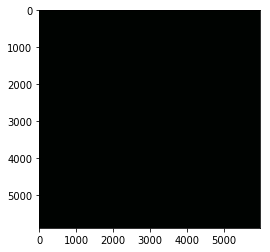

In [33]:
single_image_crops = get_crops(img_aug, PATCH_SZ, PATCHES_PER_IMAGE)
    
print(single_image_crops[0].shape)

import cv2
from matplotlib import pyplot as plt

img = img_aug
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

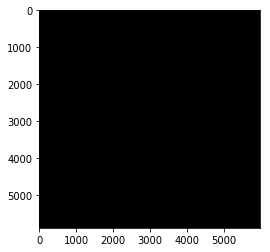

In [30]:
img_norm.shape

import cv2

img = img_norm
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [ ]:
if __name__ == "__main__":
    parser = argparse.ArgumentParser()
    arg = parser.add_argument
    arg("--images",
        required=False,
        #default=DEFAULT_INPUT_DIR,
        default="/home/llu1/HardDisk/TCGA_HC_image/SVS_Data",
        metavar="img_dir",
        help="Input image directory. Default: data/train")
    arg("--features",
        required=False,
        #default=DEFAULT_PREPROCESSED_ROOT,
        default= "/home/llu1/HardDisk/TCGA_HC_image/results/pre_processing_features",
        metavar="feat_dir",
        help="Feature root dir. Default: data/preprocessed/train")
    args = parser.parse_args([])
    INPUT_DIR = args.images
    PREPROCESSED_ROOT = args.features

    # models import ResNet, Inception, VGG
    NN_MODELS = [ResNet, Inception, VGG]

    input_files = recursive_glob(INPUT_DIR, file_template="*.svs")

    for SCALE in SCALES:
        print("SCALE:", SCALE)
        for NN_MODEL in NN_MODELS:
            print("NN_MODEL:", NN_MODEL.__name__)
            for PATCH_SZ in PATCH_SIZES:
                print("PATCH_SZ:", PATCH_SZ)
                PREPROCESSED_PATH = join(PREPROCESSED_ROOT, "{}-{}-{}".format(NN_MODEL.__name__, SCALE, PATCH_SZ))
                
                if not exists(PREPROCESSED_PATH):
                    makedirs(PREPROCESSED_PATH)
                    
                
                #model = NN_MODEL(batch_size=BATCH_SIZE)
                model = NN_MODEL()
                #output_files = [join(PREPROCESSED_PATH, basename(f).replace("tif", "npy")) for f in input_files]
                output_files = [join(PREPROCESSED_PATH, basename(f).replace("svs", "npy")) for f in input_files]
                file_list = zip(input_files, output_files)

                print(file_list)
                crops_and_output_file = crops_gen(file_list)
                crops_and_output_file_ = threaded_generator(crops_and_output_file, num_cached=NUM_CACHED)
                features_gen(crops_and_output_file_, model)
